# Introduction


[Integrals](http://en.wikipedia.org/wiki/Integral) and [derivatives](http://en.wikipedia.org/wiki/Derivative) are widely used in 
scientific modeling and simulations.  Integration, along with its inverse operation
differentiation, are the two main operations of calculus.  Integrals and derivatives have many applications
in science and engineering.  For example, one of the most common interpretations of integrating a function
is that it gives us an answer for the area contained under the curve made by the function between the 2 points we are integrating
over.  In 3 or higher dimensions, integration can determine the volume of the shape described by very complex functions.

One of the most basic but most important applications of computers in scientific modeling is the evaluation of integrals.
Some integrals can be solved analytically.  But many, especially interesting real-world scientific and
engineering problems, cannot be solved exactly in this manner.  In such cases, however, it is (usually) possible to 
approximate the answer of such integrals computationally.  As we discussed in previous chapters, we can 
approximate the answer to an arbitrary accuracy, of whatever precision we may need, provided we are willing to 
trade off the increase in accuracy by needing to do more and longer computation.  Though as we will see in this
notebook, the algorithm we use to compute the approximation of the integral can have a big impact on the tradeoff
between speed and accuracy.  Some methods, for very little extra work, can potentially increase the accuracy of
the approximation significantly.

In this lecture notebook we will be looking at different fundamental numerical techniques for evaluating integrals. We will discuss
some of the issues, again, that come up from the numerical approximations we make when using digital computers, when working
with continuous, infinitely precise functions.  And we will have a discussion and analysis of the errors that numerical
techniques introduce because of their approximation methods, and analyze the error behavior and discuss what this means in
terms of using such techniques for scientific and engineering simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Fundamental Methods for Evaluating Integrals on a Computer


Suppose we wish to evaluate computationally the integral of a (simple) function.  Let us start with the simplest case, the integral
of a function of a single variable over a finite range.  We will mostly look at functions that can actually be solved 
exactly using analytic methods.  However, the techniques we develop can be applied in the same manner to more complex integrals
with no easy exact solution.  We will study several techniques for the numerical evaluaiton of integrals, but we will start with
a very basic (and also very widely used) technique, the [trapezoidal rule](http://en.wikipedia.org/wiki/Trapezoidal_rule).


# Trapezoidal Rule

Suppose we have some function $f(x)$ and we want to calculate its integral with respect to $x$ from $x = a$ to $x = b$. This
is what is known as evaluating a definite integral.  The standard notation in mathematics for specifying such an integral is:

\begin{equation}
I(a,b) = \displaystyle\int_{a}^{b} f(x)dx.
\end{equation}

We have not specified the function we are integrating here yet, the $f(x)$.  Let us use the following simple function to 
illustrate more exactly what we will do to compute the approximate integral:

\begin{equation}
f(x) = \frac{1}{4}x^3 - \frac{5}{2}x^2 + 5x + 8
\end{equation}

You have practiced and seen many example of creating a vectorized function in Python that will calculate such a 
function, and display its values.  Here is a vectorized implementation of this cubic function, that accepts a scalar
or numpy array value as the x value(s) and then computes all of the corresponding y values by the given function:


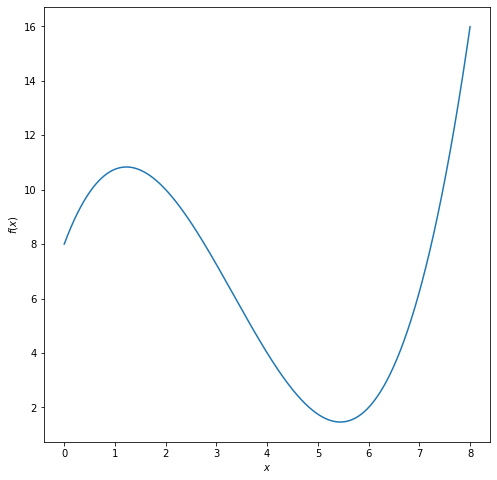

In [2]:
def f(x):
    return 0.25*x**3 - 2.5*x**2 + 5*x + 8

a = 0
b = 8
x = np.arange(a, b, 0.001)

plt.figure(figsize=(8,8))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.plot(x, f(x));

There is no known way to calculate an integral exactly in all cases, for any arbitrary and possibly complex function, on a
computer, but we can do it approximately by using the Trapezoidal rule.  To understand the Trapezoidal rule, it is useful
to again remember that one interpretation of calculating the integral is that we are computing the area under the curve of
the function.  In the previous figure we could, for example, want to calculate the area under the curve from $x=0$ to 
$x=8$.  When we say the "area under the curve" we mean all of the area below the function $f(x)$ and above the origin
where $y = 0$.

Estimating the area under the curve works in this manner.  We divide up the area under the $f(x)$ curve into 
retangular slices. We can easily calculate the area exactly of rectangles.  We sum up the areas of our rectangular 
slices, and then this sum serves as an approximation of the area under the curve:

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
Approximated area for num_rects = 8: 53.000000


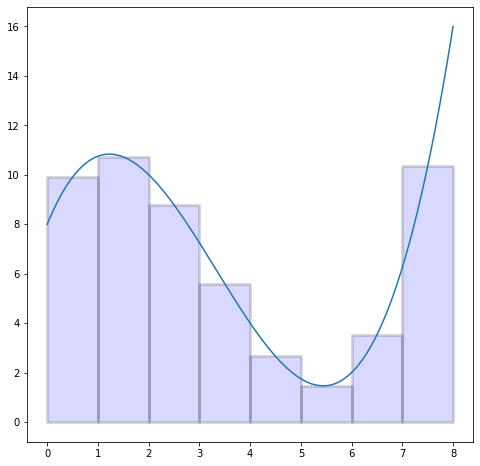

In [3]:
# the begin and end points we wish to integrate the curve over
a = 0.0
b = 8.0

# calculate x positions of the rectangular slices
num_rects = 8.0 # number of rectangular slices 'n' to divide area up into
step = (b - a) / num_rects
rects = np.arange(a, b+step, step)
print( rects ) 

# draw the curve and the rectangles we will be using
plt.figure(figsize=(8,8))
x = np.arange(a, b, 0.001)
plt.plot(x, f(x))
ax = plt.gca()
for i in range(1, len(rects)):
    x_low = rects[i-1]
    x_high = rects[i]
    x_mid = (x_high + x_low) / 2.0
    height = f(x_mid)
    ax.fill_between([x_low, x_high], [height, height], facecolor='blue', edgecolor='black', linewidth=3.0, alpha=0.15)
    
# approximate the area under the curve by summing up the areas of the rectangular regions
area = 0.0
for i in range(1, len(rects)):
    x_low = rects[i-1]
    x_high = rects[i]
    x_mid = (x_high + x_low) / 2.0
    width = x_high - x_low # this should always be equal to the step size we calculated before
    height = f(x_mid)
    area += width * height
print( "Approximated area for num_rects = %d: %f" % (num_rects, area) ) 

A few notes about the code in the previous cell.  We use a variable `num_rects` to determine how many rectangles to divide the
integration up into that we wish to perform.  We then use the midpoint of each calculated rectangle position (`x_low` to `x_high`)
to determine the $y$ position (the `height`) of the rectangular slice.  All of the code in the for loop of the plotting section
in the previous cell is simply there to visually draw the rectangles that we have divided the area under the curve into.  The last
for loop does the actual approximation of calculating the area of each of the rectangles, and displaying a value.  Try the
previous cell with a larger number of rectangles.  You should intuitively see that, as the number of rectangles increase, our
approximation of the area under the curve (which is equivalent to the integral) is improving (at the cost of having to do more
calculations, of course).

The previous approximation is not especially accurate.  The actual Trapezoidal rule uses a slightly modified approach, that only
involves a little additional work.  In the trapezoidal rule, the area is divide up into trapezoids rather than rectangles.
The area under the trapezoids is (usually) a better approximation to the area under the curve.  This approach, while
involving a bit more computation than our first approach, is still very simple, and often gives perfectly adequate results.
In the next cell, we implement approximating the area using trapezoids, as we just described:

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
Approximated area for num_rects = 8: 54.000000


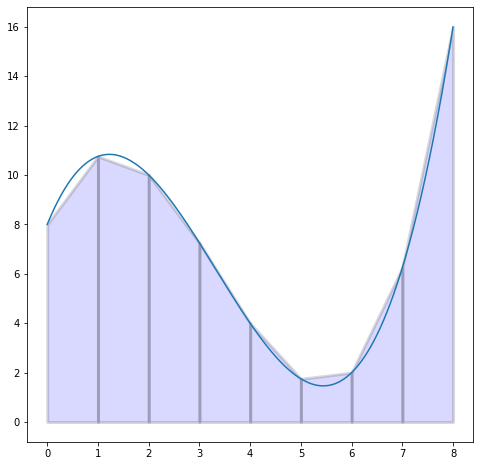

In [4]:
# the begin and end points we wish to integrate the curve over
a = 0.0
b = 8.0

# calculate x positions of the rectangular slices
num_rects = 8.0 # number of rectangular slices 'n' to divide area up into
step = (b - a) / num_rects
rects = np.arange(a, b+step, step)
print( rects ) 

# draw the curve and the trapezoids we will be using
plt.figure(figsize=(8,8))
x = np.arange(a, b, 0.001)
plt.plot(x, f(x))
ax = plt.gca()
for i in range(1, len(rects)):
    x_low = rects[i-1]
    x_high = rects[i]
    y_low = f(x_low)
    y_high = f(x_high)
    ax.fill_between([x_low, x_high], [y_low, y_high], facecolor='blue', edgecolor='black', linewidth=3.0, alpha=0.15)
    
# approximate the area under the curve by summing up the areas of the trapezoids.  We use
# the function to calculate the area of a trapezoid (a+b)/2 * h, where a and b are the lengths of the 2
# bases of the trapezoid.  Here a and b will actually be the x values of our low and high points, and the height
# h will simply be the width of our trapezoidal region
area = 0.0
for i in range(1, len(rects)):
    x_low = rects[i-1]
    x_high = rects[i]
    height = x_high - x_low # this should always be equal to the step size we calculated above
    width_1 = f(x_low)
    width_2 = f(x_high)
    area += 0.5 * (width_1 + width_2) * height
print( "Approximated area for num_rects = %d: %f" % (num_rects, area) ) 

A few notes about the previous cells calculations using trapezoid slices.  We use the formula to calculate the
[area of a trapezoid](http://en.wikipedia.org/wiki/Trapezoid):

\begin{equation}
area = \frac{a + b}{2} height
\end{equation}

Where $a$ and $b$ are the lengths of the 2 bases of the trapezoid, and the height is the distance between the 2 bases.  In our
case, we need to sort of turn the trapezoids on their side, to think of them in the normal way we do when calculating the area
of a trapezoid.  If you turn each trapezoid on its side, the $a$ and $b$ bases are simply the $y$ values of the function $f(x)$
at our `x_low` and `x_high` points that we divided the interval into.  And, with the trapezoid turned on its side, the `height` 
is simply the width of each trapezoidal section we divided the interval into.  I calculated the `height` each time in the
loop to calculate the `area`, but all of the heights of our trapezoids should be equal to the step size we calculated at the
start of the cell.

Also, again, you should intuitively see that the approximations made by the trapezoids are, in general, better approximations of the area under the curve than using rectangles.  This is becase, the straight line approximation between the `x_low` and
`x_high` are (usually) better approximations of the slope of our function curve between those 2 points.  Also you should see
that if we increase the number of trapezoids that we divide our interval up into, that the approximation will be improved.

The function we have been using for the examples of integration using slices so far can be solved analytically,
and we can get an exact value for the integral from $x=0$ to $x=8$ of our function.  The antiderivative of our function is

\begin{equation}
\displaystyle\int_0^8 (\frac{1}{4}x^3 - \frac{5}{2}x^2 + 5x + 8) = \big[\frac{1}{16}x^4 - \frac{5}{6}x^3 + \frac{5}{2}x^2 + 8x\big]_0^8 = 53 \frac{1}{3}
\end{equation}

which if we plug in $F(8) - F(0)$ gives an exact analytical answer for our integral of $53 \frac{1}{3}$:

In [5]:
x = 8.0
(1.0/16.0 * (x**4.0)) - (5.0/6.0 * (x**3.0)) + (5.0/2.0 * (x**2.0)) + (x * 8.0)

53.333333333333314

You should compare the approximations of the 2 previous methods to the correct answer, and see how many intervals you need to use
in order to reach an answer correct to 2 decimal places, 4 decimal places, etc.  

# Expanded Trapezoidal Rule Equation


The equation used for the Trapezoidal rule approximation in numerical methods is usually stated and derived in the following
manner.  Suppose we divide the interval from $a$ to $b$ into N slices (or `step` as we called it in previous cells).
Each slice then will have a width of $h = (b - a) / N$, again the same as we showed in the previous cell
calculating the trapezoid areas.  Then the right-hand side of the $k$th slice falls at $a + kh$, and the
left-hand side falls at $a + kh - h = a + (k - 1)h$.  Thus the area of the trapezoid for this $k$th slice is:

\begin{equation}
A_k = \frac{1}{2} h [f(a + (k-1)h) + f(a + kh)]
\end{equation}

This is the just trapezoidal rule for calculating the area ($\frac{1}{2} (a + b) \times height$).  It gives us a
trapezoidal approximation to the area under one trapezoidal slice of our function.
Now our approximation for the area under the curve for the whole interval we are calculating the definite integral on
is the sum of the areas of the trapezoids for all N slices, and it can be written as:

\begin{equation}
I(a,b) \approx \displaystyle\sum_{k=1}^{N}A_k = \frac{1}{2}h \sum_{k=1}^{N}[f(a + (k-1)h) + f(a + kh)] \\
\; \; \; \; \; \; \; \; \; \; \; \; \; \; \; = h\big[\frac{1}{2} f(a) + f(a+h) + f(a+2h) + ... + \frac{1}{2}f(b)\big] \\
\; \; \; \; \; \; \; \; \; \; \; \; \; \; \; = h\big[\frac{1}{2} f(a) + \frac{1}{2} f(b) + \displaystyle\sum_{k=1}^{N-1}f(a + kh)\big]
\end{equation}

where we have done some rearranging of the summation term of the slices. This rearrangement into the final form makes 
it very easy to write a vectorized function implementation to calculate the trapezoidal approximation of any function
we can write as a Python function.  Here is an implementation of our final form of the trapezoidal rule as a Python
vectorized function:

In [6]:
def trapezoidal_approximation(a, b, f, N):
    """Approximate definite integral of function from a to b using the Trapezoid rule.
    This function is vectorized, it uses numpy array operations to calculate the approximation.
    
    a, b - Scalar float values, the begin and end points of the interval we are to
            integrate the function over.
    f - A vectorized function, should accept a numpy array of x values, and compute the
          correspoinding y values for all points according to some function.
    N - Scalar int value, the number of intervals to subdivide our approximation into.
    
    returns - A scalar float value, the approximated integration of the function over the
        given interval
    """
    h = (b - a) / N # the step size, eqivalent to the trapezoid heights we are dividing interval into
    x = np.arange(a+h, b, h) # the x value points we divide interval into
    return h * (0.5 * f(a) + 0.5 * f(b) + np.sum(f(x)))

The only tricky part of the `trapezoidal_approximation` function is our creation of the x values as a numpy array.  Notice that
in the summation formula, we need to sum up a series of values of evaluationg the function $f(x)$ at regular intervals
(the slices we are cutting the area into).  When $k=1$, we evaluate the funct at f(a+h), when $k=2$ we evaluate the
function at $f(a+2h)$, etc. up to $k=N-1$ where we evaluate the function at $f(a +(N-1)h)$.  As you should know by now, a
vectorized numpy function will return the computed function values for all the x values we pass into it as a numpy array.
So, in order to implement the summation part of the trapezoidal equation, we simply need to calculate the function for all of the
x values of the interval slices, and then sum these up.  

The creation of the numpy array named `x` in our `trapezoidal_approximation` function does precisely this.  Remember that
we are given the values of $a, b$ as inputs to the function, and these are the beginning and end points of the definite 
interval over which we will integrate the function.  We are also give the number of slices, $N$, to slice the interval
up into, and from these 3 values, we can compute the width of each slice, named `h`, as well as the $x$ points in the
interval we need to evaluate our function at.

You should make sure you understand what the `np.arange()` call is doing, and how it is used to calculate the $f(x)$
values.  For example, if $a=0$ and $b=8$ is the interval we want to integrate over, and we want to divide the interval
up into $N=8$ slices, we will get an array `x` of:

In [7]:
a = 0.0
b = 8.0
N = 8
h = (b - a) / N

x = np.arange(a+h, b, h)
print( x ) 

[1. 2. 3. 4. 5. 6. 7.]


Which are basically the `x` value of right hand side of the the $k=1$, then of the $k=2$ slice, up to the $k=N-1=7$ slice.
And we can use any vectorized function to then calculate the `y` values of our function at those slice positions:

In [8]:
print( f(x) ) 

[10.75 10.    7.25  4.    1.75  2.    6.25]


And finally, we can use the `np.sum()` numpy library function, in order to compute the sum of all of these values:

In [9]:
print( np.sum(f(x)) ) 

42.0


Lets look at the result of integrating our example function using this `trapezoidal_approximation` numerical method.
Here is an example of integrating our previous function again, over the same interval, using our trapezoidal approximation
function:

In [10]:
def f1(x):
    return 0.25*x**3 - 2.5*x**2 + 5*x + 8

N = 100
a = 0.0
b = 8.0
area = trapezoidal_approximation(a, b, f1, N)
print( "Approximate area calculated for %d slices using trapezoidal_approximation: %f" % (N, area) ) 

Approximate area calculated for 100 slices using trapezoidal_approximation: 53.337600


And another example.  For the function:

\begin{equation}
x^4 - 2x + 1
\end{equation}

the correct answer for the interval from $x=0$ to $x=2$ is

\begin{equation}
\displaystyle\int_0^2 (x^4 - 2x + 1)dx = \Big[\frac{1}{5}x^5 -x^2 + x\Big]_0^2 = 4.4
\end{equation}

In [11]:
def f2(x):
    return x**4 - 2*x + 1

N = 10
a = 0.0
b = 2.0
area = trapezoidal_approximation(a, b, f2, N)
print( "Approximate area calculated for %d slices using trapezoidal_approximation: %f" % (N, area) ) 
print( "   Percentage of error: %f" % (abs(4.4 - area) / area * 100.0)  ) 

N = 100
area = trapezoidal_approximation(a, b, f2, N)
print( "Approximate area calculated for %d slices using trapezoidal_approximation: %f" % (N, area) ) 
print( "   Percentage of error: %f" % (abs(4.4 - area) / area * 100.0)  ) 

N = 1000
area = trapezoidal_approximation(a, b, f2, N)
print( "Approximate area calculated for %d slices using trapezoidal_approximation: %f" % (N, area) ) 
print( "   Percentage of error: %f" % (abs(4.4 - area) / area * 100.0) ) 

Approximate area calculated for 10 slices using trapezoidal_approximation: 4.506560
   Percentage of error: 2.364553
Approximate area calculated for 100 slices using trapezoidal_approximation: 4.401067
   Percentage of error: 0.024236
Approximate area calculated for 1000 slices using trapezoidal_approximation: 4.400011
   Percentage of error: 0.000242


In our second example, using only 10 slices, we are off by 0.10656, an error of about 2%.  If we increase to using $N=100$ slices
we reduce the error to 0.001067, which is accurate to 0.02%, which is pretty good.  And if we use $N=1000$ slices, we get and error of .000011, which is accurate to .0002%.  Notice that we are increasing the work by a factor of 10 each time, but accuracy is
increasing by a factor of 100 for each order of magnitude more work we perform.  We will discuss the reason for this in a bit more
detail later, when we talk about the approximation errors of numerical integration methods.


# Simpson's Rule


The Trapezoidal rule is the simplest of numerical integration methods, and it often gives perfectly acceptable results.  In fact,
surprisingly, the Trapezoid rule can sometimes give better results than more sophisticated methods, especially when the function
being integrated is varying rapidly.  This is because the straight line approximation that the Trapezoidal method uses will ignore
such singularities sometimes, that can throw off other methods.  One should not turn up one's nose at the Trapezoidal
approximation method.  It is used widely, and it is also the basis for several more sophisticated methods, including 
adaptive methods and Romberg integration, so understanding how it works gives you an  intuitive understanding of how more
sophisticated methods modify this basic algorithm to mitigate some of the difficulties we can encounter.

However, there are many situations where we do need a method that gives a better approximation, or arrives at a good
enough approximation in less time. We can always increase the number of `N` slices to increase accuracy.  But in some cases,
for example where the function is varying rapidly, a very large number of steps may be needed in order to achieve a
desired accuracy.  There are other, more advanced schemes for calculating integerals that can achieve high accuracy
while still arriving at an answer relatively quickly.  

As we have just seen, the trapezoidal method estimates the area under the curve by approximating the slope for small 
sections using straight-line segments.  We can often get better results if we approximate the function using
curves, by fitting a quadratic function to the segments instead.  In order to specify a quadratic completely
one needs three points, not just two as with a straight line.  So in this method we take a pair of adjacent
slices and fit a quadratic through the three points that mark the boundaries of those slices.

For example, in the next cell we divide the area under the curve into 4 slices, then calculate two quadratic
curves approximating the function over pairs of slices:

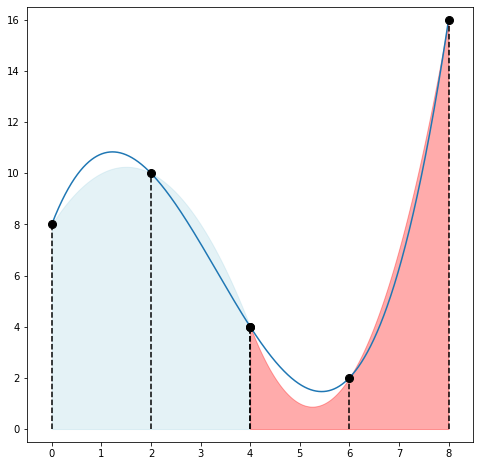

In [12]:
# the first function again that we were working with previously
def f(x):
    return 0.25*x**3 - 2.5*x**2 + 5*x + 8


# the begin and end points we wish to integrate the curve over
a = 0.0
b = 8.0

# calculate x positions of the slices
num_rects = 4.0 # number of rectangular slices to divide area up into
step = (b - a) / num_rects
rects = np.arange(a, b+step, step)

# draw the curve and the rectangles we will be using
plt.figure(figsize=(8,8))
x = np.arange(a, b, 0.001)
plt.plot(x, f(x))
plt.axis([-0.5, 8.5, -0.5, 16.5])

# iterate through pairs of slices, which define
# triplets of points
for slice_i in range(0, len(rects)-1, 2):
    x_1 = rects[slice_i]
    x_2 = rects[slice_i + 1]
    x_3 = rects[slice_i + 2]
    
    y_1 = f(x_1) # f(-h)
    y_2 = f(x_2) # f(0)
    y_3 = f(x_3) # f(h)
    
    # display the slices, and the points we will fit quadratic to 
    # on the curve
    plt.plot([x_1, x_2, x_3], [y_1, y_2, y_3], 'ko', markersize=8.0)
    plt.plot([x_1, x_1], [0, y_1], 'k--')
    plt.plot([x_2, x_2], [0, y_2], 'k--')
    plt.plot([x_3, x_3], [0, y_3], 'k--')
    
    # fit quadratic parameter A, B, C of Ax^2 + Bx + C
    # and plot the quadratic curve over the 2 slice/3 point interval
    h = x_2 - x_1 # is always equivalent to the step size
    A = (1.0/(h**2.0)) * (0.5 * y_1 - y_2 + 0.5 * y_3)
    B = (1.0 / (2.0 * h)) * (y_3 - y_1)
    C = y_2
    x = np.arange(x_1, x_3, 0.001)
    y = A*((x-x_2)**2.0) + B*(x-x_2) + C
    if slice_i % 4 == 0:
        c = "lightblue"
    else:
        c = "red"
    plt.fill_between(x, y, color=c, alpha=0.33)

The previous cell should work with any even numbered set of N slices, if you wish to see how it performs when the area is
broken into more and smaller pieces.

In the previous cell, the 2 different color shaded areas represent adjacent pairs of slices used to fit a quadratic function
too.  We fit a quadratic function through the 3 points that mark the boundaries of each pair of slices.  We fit a quadratic
function of form $Ax^2 + Bx + C$ through the points, where A, B and C are parameters that we have to determine so that the
quadratic function goes through the 3 selected points.

In the previous cell, we set the midpoint of each of our pair of slices as 0, and we used the three points at $x = -h, 0, h$.
If we fit the quadratic function through these points, then by definition we will have:

\begin{equation}
f(-h) = Ah^2 - Bh + C,  \; \; f(0) = C, \; \; f(h) = Ah^2 + Bh + C
\end{equation}

Solving these equations simultaneously allows us to determine values for the A, B and C parameters, such that the quadratic
function will go through our 3 points.  Solving for A, B and C gives us:

\begin{equation}
A = \frac{1}{h^2} \big[\frac{1}{2} f(-h) - f(0) + \frac{1}{2} f(h) \big], \; B = \frac{1}{2h} \big[f(h) - f(-h) \big], \; C = f(0)
\end{equation}

In the previous cell, we solved for the A, B, C parameters in order to fill in the regions under our quadratic approximation, so 
that we could visualize the approximate areas we would be using to estimate the integral.  Given our fitted A, B and C parameters,
the area under the quadratic function for any pair of slices is given by:

\begin{equation}
\displaystyle\int_{-h}^{h} (Ax^2 +Bx + C)dx = \big[\frac{1}{3}Ax^3 + \frac{1}{2}Bx^2 + Cx \big]_{-h}^{h}
\end{equation}

If you evaluate the definite integral for $F(h) - F(-h)$ the result is:

\begin{equation}
\frac{2}{3}Ah^3 + 2Ch
\end{equation}

Then substituting for our previous fitted values of A, B and C, this equation becomes an equation in terms of the pairs of adjacent
slices we are calculating the area under, namely:

\begin{equation}
\frac{1}{3}h \big[f(-h) + 4f(0) + f(h) \big]
\end{equation}


This final equation is the Simpon's rule.  This equation basically gives us the area under the quadratic approximation for
2 adjacent slices of width $h$ that are located at positons $f(-h), f(0), f(h)$  Note that the final formula for the approximate
area for the 2 slices only involves $h$ and evaluating the function we are approximating at 3 locations.  We don't actually
have to perform the details of fitting the quadratic function, we simply plug in the numbers to get our approximate area.
This makes implementing a vectorized version of the Simpon's rule almost as simple as implementing the Trapezoidal rule.

The only remaining step to use this formula is to divide our interval into many sets of adjacent slices, then sum up the
calculated quadratic approximation of all of our pairs of slices.  If we are integrating from $x=a$ to $x=b$ in slices
of width $h$, where $h = (b - a) / N$ as before, then the three points bounding the first pair of slices will fall at
$x = a, a+h, a+2h$, and the second pair will be at $a+2h, a+3h, a+4h$, etc.  Then the approximation of the entire integral
is given by:

\begin{equation}
I(a,b) \approx \frac{1}{3}h \big[ f(a) + 4f(a+h) + f(a+2h) \big] \\
\; \; \; \; \; \; \; \; \; \; \; \; + \frac{1}{3}h \big[ f(a+2h) + 4f(a+3h) + f(a+4h) \big] + ... \\
\; \; \; \; \; \; \; \; \; \; \; \; + \frac{1}{3}h \big[ f(a+(N-2)h) + 4f(a+(N-1)h) + f(b) \big] \\
\end{equation}

Note that the total number of slices $N$ must be even for this to work.  Collecting terms together and simplifying, we now have:

\begin{equation}
I(a,b) \approx \frac{1}{3}h \big[f(a) + 4f(a+h) + 2f(a+2h) + 4f(a+3h) + ... + f(b) \big] \\
\; \; \; \; \; \; \; \; = \frac{1}{3}h \Big[f(a) + f(b) + 4 \displaystyle\sum_{\substack{k odd \\ 1..N-1}} f(a+kh) + 2 \displaystyle\sum_{\substack{k even\\2..N-2}} f(a + kh)\Big] \\
\end{equation}

This final form is again easily implemented as a vectorized function in Python.  The first sum steps through odd values of
$k$, $k=1,3,5,...,N-1$, while the second sum steps through even values of $k$, $k=2,4,6,...,N-2$.  The sums over
odd and even values of k can be conveniently accomplished using step values for the generated set of points in a
numpy array.  Lets implement the expanded Simpson's rule as a vectorized Python function

In [13]:
def simpsons_approximation(a, b, f, N):
    """Approximate the definite integral over the interval from a to b of some function f
    using the expanded Simpson's rule to perform the approximation. This function is vectorized, 
    it uses numpy array operations to calculate the approximation.
    
    a, b - Scalar float values, the begin and end points of the interval we are to
            integrate the function over.
    f - A vectorized function, should accept a numpy array of x values, and compute the
          correspoinding y values for all points according to some function.
    N - Scalar int value, the number of intervals to subdivide our approximation into.
    
    returns - A scalar float value, the approximated integration of the function over the
        given interval
    """
    h = (b - a) / N # the step size, eqivalent to the trapezoid heights we are dividing interval into
    x_odd = np.arange(a+h, b, 2*h) # define numpy arrays for the odd and even x slice boundaries
    x_even = np.arange(a+2*h, b, 2*h)    
    return 1.0/3.0 * h * ( f(a) + f(b) + 4.0 * np.sum(f(x_odd)) + 2.0 * np.sum(f(x_even)) )

This function is similar to our `trapezoidal_approximation` in form, but we implement the Simpson's rule instead.  And we
need to create 2 arrays, of the `x` values at the odd numbered slices, and the `x` values at the even numbered slices.

We will now do the same analysis as we did previously with the trapezoidal rule to look at the percentage error
in the approximation as we change the number of intervals we do the approximaiton with.

In [14]:
def f2(x):
    return x**4 - 2*x + 1

N = 10
a = 0.0
b = 2.0
area = simpsons_approximation(a, b, f2, N)
print( "Approximate area calculated for %d slices using simpsons_approximation: %f" % (N, area) ) 
print( "   Percentage of error: %f" % (abs(4.4 - area) / area * 100.0)  ) 

N = 100
area = simpsons_approximation(a, b, f2, N)
print( "Approximate area calculated for %d slices using simpsons_approximation: %0.15f" % (N, area) ) 
print( "   Percentage of error: %f" % (abs(4.4 - area) / area * 100.0)  ) 

N = 1000
area = simpsons_approximation(a, b, f2, N)
print( "Approximate area calculated for %d slices using simpsons_approximation: %0.15f" % (N, area) ) 
print( "   Percentage of error: %f" % (abs(4.4 - area) / area * 100.0) ) 

Approximate area calculated for 10 slices using simpsons_approximation: 4.400427
   Percentage of error: 0.009696
Approximate area calculated for 100 slices using simpsons_approximation: 4.400000042666665
   Percentage of error: 0.000001
Approximate area calculated for 1000 slices using simpsons_approximation: 4.400000000004267
   Percentage of error: 0.000000


If you recall, the trapezoidal approximation had a 2% error when we used $N=10$ slices, but the simpson's approximation is
already accurate to 3 significant digits with an error of only 0.01% when using the same number of slices.  Further, for
$N=100$ and $N=1000$ slices, the approximation is even better, approaching a precision that is better than the precision
that can be represented by our machine.

If you need an accurate answer for an integral then Simpson's rule is a good choice in many cases, giving precise results with
relatively little effort.  Alternatively if you need to evaluate an integral quickly - perhaps because you will be evaluating many integrals as part of a very large simulation - then the Simpson's rule may again be a good choice, since it can give
moderately accurate answers even with only a small number of steps.

# Errors on Integrals


As we have been emphasizing, our numerical methods for calculating integrals are only approximations.  As with most numerical
calculations there are usually errors in rounding and representation that occur as we calculate the integral.  However, this
is not the main source of error when calculating the integrals using methods as we have just developed.  The main source
of error is because of the approximation we are making of the true value of the function, a linear approximation in the
case of the Trapezoidal method, and a quadratic approximaiton in the case of Simpson's method.   Both of these methods
calculate the area under an approximation of the true function, not the actual function itself.  We will call this the
**approximation error**. How big of an error does this approximation introduce?

Consider again an integral $\int_a^b f(x) dx$, and let us first look at the trapezoidal rule.  To simplify our notation,
let us define a sequence of values $x_k = a + kh$ as a shorthand for the positions at which we evaluate the integrand
$f(x)$.  Basically $x_k$ is equivalant to the `x` numpy array we created in the `trapazoidal_approximation` function, it
is an array (a sequence) of `x` position values at which we need to evalute the function we are integrating.  We will refer
to these positions as *sample points*.  

Now consider one particular slice of the integral, the one that falls between $x_{k-1}$ and $x_k$, and let us perform a
[Taylor expansion](http://en.wikipedia.org/wiki/Taylor_series) of $f(x)$ about $x_{k-1}$ like this:

\begin{equation}
f(x) = f(x_{k-1}) + (x - x_{k-1})f'(x_{k-1}) + \frac{1}{2}(x - x_{k-1})^2 f''(x_{k-1}) + ... 
\end{equation}

where $f'$ and $f''$ denote the first and second derivatives of $f$ respecitvely.  The Taylor series allows us to
represent a function as an infinite sum of terms (of the first, second, third, etc. derivative).  Why do we do this? 
Well this is very common in scientific computing, as it gives us a way to approximate a function using the first few
finite number of terms of the series.  And then, maybe more importantly, the terms of the series that you don't use
give you a quantative estimate of the amount of error that your approximation has introduced.

We can integrate this infinite series for our slice from $x_{k-1}$ to $x_k$ to give us:

\begin{equation}
\displaystyle \int_{x_{k-1}}^{x_k} \! f(x) \, \mathrm{d}x = f(x_{k-1})\int_{x_{k-1}}^{x_k} \! \mathrm{d}x + f'(x_{k-1}) \int_{x_{k-1}}^{x_k} \! (x - x_{k-1}) \, \mathrm{d}x\\
\displaystyle \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; + \frac{1}{2}f''(x_{k-1}) \int_{x_{k-1}}^{x_k} \! (x - x_{k-1})^2 \, \mathrm{d}x + ...
\end{equation}

Now we make the substitution $u = x - x_{k-1}$, which gives


\begin{equation}
\displaystyle \int_{x_{k-1}}^{x_k} \! f(x) \, \mathrm{d}x = f(x_{k-1})\int_{0}^{h} \! \mathrm{d}u + f'(x_{k-1}) \int_{0}^{h} \! u \, \mathrm{d}u + \frac{1}{2}f''(x_{k-1}) \int_{0}^{h} \! u^2 \, \mathrm{d}u + ... \\
\displaystyle \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; = hf(x_{k-1}) + \frac{1}{2}h^2 f'(x_{k-1}) + \frac{1}{6}h^3 f''(x_{k-1}) + O(h^4)
\end{equation}

where $O(h^4)$ denotes the rest of the terms in the series, those in $h^4$ and higher, which we are neglecting.

We can do a similar expansion around $x = x_k$ and again integrate from $x_{k-1}$ to $x_k$ to get:

\begin{equation}
\displaystyle \int_{x_{k-1}}^{x_k} \! f(x) \, \mathrm{d}x = hf(x_{k}) - \frac{1}{2}h^2 f'(x_{k}) + \frac{1}{6}h^3 f''(x_{k}) - O(h^4)
\end{equation}

You should notice that, unlike the previous expansion, when expanding on the point $x = x_k$ the signs of the terms in this
series alternate.

We can take the average of the previous 2 equations (by adding them together and dividing by 2), and get the following:

\begin{equation}
\displaystyle \int_{x_{k-1}}^{x_k} \! f(x) \, \mathrm{d}x = \frac{1}{2}h \big[ f(x_{k-1}) + f(x_k) \big] + \frac{1}{4}h^2 \big[ f'(x_{k-1}) - f'(x_k) \big] + \frac{1}{12}h^3 \big[ f''(x_{k-1}) + f''(x_k) \big] + O(h^4)
\end{equation}

Finally, we sum this expression over all slices $k$ to get the full integral that we want:

\begin{equation}
\displaystyle \int_{a}^{b} \! f(x) \, \mathrm{d}x = \sum_{k=1}^{N} \int_{x_{k-1}}^{x_k} \! f(x) \, \mathrm{d}x \\
\displaystyle \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; = \frac{1}{2}h \sum_{k=1}^{N} \big[ f(x_{k-1}) + f(x_k) \big] + \frac{1}{4}h^2 \big[ f'(a) - f'(b) \big] \\
\displaystyle \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; + \frac{1}{12}h^3 \sum_{k=1}^{N} \big[ f''(x_{k-1}) + f''(x_k) \big] + O(h^4) 
\end{equation}

Let's take a closer look at this final expression and try and explain what we did.  If you look closely and compare this final
form to the trapezoidal rule, you will see that the first sum on the right-hand side is exactly equal to the trapezoidal rule.
When we evaluate the trapezoidal rule, we evaluate only this sum and discard all of the terms following.  The size of the
discarded terms, the rest of the series, measures the amount we would have to add to the trapezoidal rule value
to get the true value of the integral.  In other words, it is equal to the **approximation Error** we incur when we use 
the trapezoidal rule.

If you didn't follow all of the steps of the Taylor expansion to arrive at the final form expressing the approximation
error, don't worry too much.  As we mentioned, the Taylor expansion is another method for approximating the value of
a function.  The work we did in expanding the series, was so that we would have another expression for the integration of
a function over a definite interval.  And we expanded it the way we did, so that the first term in our expression was exactly
the same as the Trapezoidal rule expression.  Since the Taylor expansion will give an exact answer
to the value of the function (if you expand out to an infinite number of terms), then as we have stated, all of the other
terms after the first term that was equivalent to the Trapezoidal rule must give us the precise value of the error we are
incurring by using our Trapezoidal approximation.

In the second term, the term of order $h^2$, notice that almost all of the terms have canceled out of the sum, leaving only
the first and last terms, the ones evalauted at $a$ and $b$.  This is not a mistake in the equation, there really is no sum.  Since the order $h^2$ term was an average, and the terms were of opposite signs in the 2 equations we averaged together, it caused
all of the terms to cancel one another, leaving no sum and only the first and last term to evaluate.  Although we haven't 
shown it, a similar cancellation happens for the $O(h^4)$, $O(h^6)$ and all even powers of $h$.

Now take a look at the term in order $h^3$ and notice the following useful fact: the sum in this term is itself, to within on overall constant, just the trapezoidal rule approximation to the integral of $f''(x)$ over the interval from $a$ to $b$.
Specifically if we take the final taylor expansion and make the substitution $f(x) \to f''(x)$ on the left-hand
side, we get

\begin{equation}
\displaystyle \int_{a}^{b} \! f''(x) \, \mathrm{d}x = \frac{1}{2} h \sum_{k=1}^{N} \big[ f''(x_{k-1}) + f''(x_k) \big] + O(h^2)
\end{equation}

Multiplying by $\frac{1}{6}h^2$ and rearranging, we then get

\begin{equation}
\displaystyle \frac{1}{12}h^3 \sum_{k=1}^{N} \big[ f''(x_{k-1}) + f''(x_k) \big] = \frac{1}{6}h^2 \int_{a}^{b} \! f''(x) \, \mathrm{d}x + O(h^4) \\
\displaystyle \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; = \frac{1}{6}h^2 \big[ f'(b) - f'(a) \big] + O(h^4)
\end{equation}

since the integral of $f''(x)$ is just $f'(x)$.  Substituting this result back into the final taylor expansion equation for the
$h^3$ order tem, and canceling some terms, we find that

\begin{equation}
\displaystyle \int_{a}^{b} \! f''(x) \, \mathrm{d}x = \frac{1}{2} h \sum_{k=1}^{N} \big[ f(x_{k-1}) + f(x_k) \big] + \frac{1}{12}h^2 \big[ f'(a) - f'(b) \big] + O(h^4)
\end{equation}

Thus, to leading order in $h$, the value of the terms dropped when we use the trapezoidal rule, which equals the approximation 
error $\epsilon$ on the integral, is

\begin{equation}
\epsilon = \frac{1}{12}h^2 \big[ f'(a) - f'(b) \big]
\end{equation}

This is the *Euler-Maclaurin formula* for the error on the trapezoidal rule.  More correctly it is only the first term in
the formula; the full formula keeps the terms to all orders in $h$.  We can see that the next term in the series is of order
$h^4$.  The same way that the $h^3$ order term canceled out from the substitution we just did, we can show that only the
even powers of $h$ survive.  So the next term after $h^4$ is $h^6$, then $h^8$, and so forth.  So long as $h$ is small, however,
we can neglect the $h^4$ and higher terms - the leading term, that we gave a name of $\epsilon$ just now, is usually
enough.  Remember that $h$ represents our interval width that we divide the full interval into.  Thus we can use the $\epsilon$
Euler-Maclurin formula to determine what size of $h$ we need in order to get an answer with a desired precision.  And we can ignore any higher order terms in our error estimate, because for small $h$ they will be much much smaller than the $h^2$ order term.


The final form of our Taylor expansion tells us that the trapezoidal rule is a first-order integration rule, meaning it is
accurate up to and including terms proportional to $h$ and the leading-order approximation error is of order $h^2$.  That is, 
a first-order rule is *accurate* to $O(h)$ and has an *error* $O(h^2)$

In addition to the approximation error, there is also rounding error in our calculations when doing numerical integration. 
As we have discussed, the rounding and representation errors should be much smaller than the approximation error for our
numerical integration methods, but how much smaller?  Recall that in lecture notebook 3 we stated that the rounding errors
will have approximate size $C$ times the original value of the integral, where $C$ is the error constant, which is about
$10^{-16}$ in Python on modern 64-bit machines using the standard machine floating point representation.  The $\epsilon$
formula tells us that the approximation gets amaller as $h$ gets smaller.  So we can make our result more accurate by decreasing
$h$ or, equivalently, using a larger number of interval slices $N$.  However, there is little point in making $h$ so small that
the approximaiton error becomes much smaller than the rounding error.  Further decreases in $h$ beyond this point will
only make our program slower, by increasing the number of terms in the sums, without improving the accuracy of our
calculation significantly, since accuracy will be dominated by rounding error after that point.

Thus decreases in $h$ will only help us up to the point at which approximation and rounding errors are roughly equal, which
is the point where

\begin{equation}
\displaystyle \frac{1}{12}h^2 \big[f'(a) - f'(b) \big] \simeq C \int_a^b \! f(x) \, \mathrm(d)x
\end{equation}

Rearranging for $h$ we get

\begin{equation}
h \simeq \sqrt{ \frac{12 \int_a^b \! f(x) \, \mathrm{d}x}{f'(a) - f'(b)} } C^{\frac{1}{2}}
\end{equation}

Or we can set $h = (b - a) / N$ to get

\begin{equation}
N \simeq (b - a) \sqrt{ \frac{f'(a) - f'(b)}{12 \int_a^b \! f(x) \, \mathrm{d}x} } C^{-\frac{1}{2}}
\end{equation}

Thus if, for example, all the factors except last are of order unity (about the same order of magnitude as 1.0), then rounding
error will become important when $N \simeq 10^8$.  For example, using 
$(b - a) \approx 1$ and $f'(a) - f'(b) \approx 1$ and the integral of the function is approximately 1:

In [15]:
C = 1e-16 # error constant, about 10^-16 in current versions of python
order = np.sqrt(1.0/12.0)
N =  order *  C**-0.5
print( "%e" % N ) 

2.886751e+07


Looked at another way, this is the point at which the accuracy of the trapezoidal rule reaches the machine precision, the
maximum accuracy with which the computer can represent the result.  There is no point increasing the number of integration
slices beyond this point; the calculation will not become any more accurate.

However, $N=10^8$ would be an unusually large number of slices for the trapezoidal rule - it would be rare to use such a large
number when equivalent accuracy can be achieved using much smaller $N$ with a more accurate rule such as Simpson's rule.  In most
practical situations, therefore, we will be in the regime where approximation error is the dominant source of inaccuracy and it is
safe to assume that rounding error can be ignored.

We can do an analogous error analysis for Simpson's rule.  The algebra is similar but more tedious.  Here we'll just jump to the
results.  For an integral over the interval from $a$ to $b$ the approximation error for the leading order term of the
Simpson's rule is given by

\begin{equation}
\epsilon = \frac{1}{90}h^4 \big[f'''(a) - f'''(b) \big]
\end{equation}

Thus Simpson's rule is a third-order integration rule - two orders better than the trapezoidal rule - with a fourth-order
approximation error.  For small values of $h$ this means that the error on Simpson's rule will typically be much smaller
than the error on the trapezoidal rule and it explains why Simpson's rule gave such superior results in our example calculations.

The rounding error for Simpson's rule is again of order $C \int_a^b \! f(x) \, \mathrm{d}x$.  The equivalent expression for 
the number of slices we need to approach machine precision is:

\begin{equation}
N = (b - a) \sqrt[4]{ \frac{f'''(a) - f'''(b)}{90 \int_a^b \! f(x) \, \mathrm{d}x} } \, C^{-\frac{1}{4}}
\end{equation}

If again the leading factors are roughly of order unity, this implies that rounding error will become important when
$N \simeq 10^4$  

In [16]:
C = 1e-16 # error constant, about 10^-16 in current versions of python
order = np.sqrt(90)
N =  order *  C**-0.25
print( "%e" % N ) 

9.486833e+04


Beyond this point Simpson's rule is so accurate that its accuracy exceeds the machine precision of the computer and there is
no point using larger values of $N$.  By contract with the trapezoidal rule, $N = 10\, 000$ is not an unusually large number of slices to use in a calculation.  Calculations with ten thousand slices can be done easily in a fraction of a second.  Thus it
is worth bearing this result in mind: there is no point using more than a few thousand slices with Simpson's rule because
the calculation will reach the limits of precision of the computer and larger values of $N$ will do no further good.

We should also note, looking at our 2 equations for $\epsilon$ for the Trapezoid and Simpson's rule that while Simpson's rule
generally does give superior accuracy, it is not always guaranteed to do better than the Trapezoid method.  The errors
in the trapezoid rule depend on the first derivative of the function, while the errors for Simpson's rule depend on the
third derivative of the function.  It can be the case that the first derivative is small, while the third derivative is
large.  In such cases, Simpson's rule could end up with larger approximaiton errors than using the Trapezoid rule.
It would be fair to say that Simpson's rule usually gives better results than the trapezoidal rule, but the prudent
scientist will bear in mind that it can do worse on occasion.

# Practical Estimation of Errors


The formulas for calculating the error on our definite integrals are useful in some situations, but in practice we cannot
always directly use them to calculate the expected approximation error.  For example, we may not be able to calculate
the needed derivatives in order to get a correct approximation error for our function.  There is, however, still an
empirical method we can use to estimate the amount of approximation error we have for a particular numerical integration.

Suppose as before that we are evaluating an integral over the interval from $x=a$ to $x=b$, and let's assume that we
are using the trapezoidal rule (although the method we use here extends to Simpson's rule as well).  Let us perform the
integral with some number of steps $N_1$, so that the step size is $h_1 = (b - a) / N_1$.

Then here is the trick to doing an empirical estimation of the approximation error: we now double the number of steps
and perform the integral again.  That is we define a new number of steps $N_2 = 2 N_1$ and a new step size
$h_2 = (b - a)/N_2 = \frac{1}{2}h_1$ and we reevaluate the integral using the trapezoidal rule, giving a new answer,
which will normally be more accurate than the previous one.  As we have seen, the trapezoidal rule introduces an
approximation error of order $O(h^2)$, which means when we half the value of $h$ *we quarter* the size of our
error.  Knowing this fact allows us to estimate how big the error is.

Lets perform this calculation.  Suppose that the true value of our integral is $I$ and let us denote our first estimate using
the trapezoidal rule with $N_1$ steps by $I_1$.  The difference between the true value and the estimate, which is the error
on the estimate, is proportional to $h^2$, so let us write it as $ch^2$ where c is a constant.  Then $I$ and $I_1$ are related
by $I = I_1 + ch_1^2$, neglecting higher-order error terms.

We can also write a similar formula for our second estimate $I_2$ of the integral, with $N_2$ steps: $I = I_2 + ch_2^2$.
Equating the two expressions for $I$ we then get

\begin{equation}
I_1 + ch_1^2 = I_2 + ch_2^2
\end{equation}

or

\begin{equation}
I_2 - I_1 = ch_1^2 - ch_2^2 = 3ch_2^2
\end{equation}

where we have made use of the fact that $h_1 = 2h_2$.  Rearranging this expression then gives the error $\epsilon_2$ on the
second estimate of the integral to be

\begin{equation}
\epsilon_2 = ch_2^2 = \frac{1}{3}(I_2 - I_1)
\end{equation}

As we have written it, this expression can be either positive or negative, depending on which way the error happens to go.
If we want only the absolute size of the error then we can take the absolute value $\frac{1}{3}|I_2 - I_1|$, which in
Python can be done using the built-in funciton `abs()`.

For example, using this we can now get a simple estimate of our error for our implementation of the `trapezoidal_approximation`
function.  Recall that for the function

\begin{equation}
x^4 - 2x + 1
\end{equation}

the correct answer for the interval from $x=0$ to $x=2$ is

\begin{equation}
\displaystyle\int_0^2 (x^4 - 2x + 1)dx = \Big[\frac{1}{5}x^5 -x^2 + x\Big]_0^2 = 4.4
\end{equation}

We had calculated approximation error before, because we knew what the exact actual answer should be.  Lets compare
the actual error, with this method for determing what the error is.

In [17]:
def f2(x):
    return x**4 - 2*x + 1

a = 0.0
b = 2.0

# estimate error for N=10 slices, by comparing N=5 to N=10 result
N_1 = 5
N_2 = 10
I_1 = trapezoidal_approximation(a, b, f2, N_1)
I_2 = trapezoidal_approximation(a, b, f2, N_2)
print( "N=10     Actual error: %f" % ( abs(I_2 - 4.4) ) ) 
print( "Estimate of the error: %f" % ( abs(1.0/3.0 * (I_2 - I_1)) ) ) 
print( "\n" ) 

# estimate error for N=100 slices, by comparing N=50 to N=100 result
N_1 = 50
N_2 = 100
I_1 = trapezoidal_approximation(a, b, f2, N_1)
I_2 = trapezoidal_approximation(a, b, f2, N_2)
print( "N=100    Actual error: %0.15f" % ( abs(I_2 - 4.4) ) ) 
print( "Estimate of the error: %0.15f" % ( abs(1.0/3.0 * (I_2 - I_1)) ) ) 
print( "\n" ) 

# estimate error for N=1000 slices, by comparing N=500 to N=1000 result
N_1 = 500
N_2 = 1000
I_1 = trapezoidal_approximation(a, b, f2, N_1)
I_2 = trapezoidal_approximation(a, b, f2, N_2)
print( "N=1000   Actual error: %0.15f" % ( abs(I_2 - 4.4) ) ) 
print( "Estimate of the error: %0.15f" % ( abs(1.0/3.0 * (I_2 - I_1)) ) ) 

N=10     Actual error: 0.106560
Estimate of the error: 0.106133


N=100    Actual error: 0.001066656000000
Estimate of the error: 0.001066613333334


N=1000   Actual error: 0.000010666665601
Estimate of the error: 0.000010666661333


The same principle can be applied to integrals evaluated using Simpson's rule, or any numerical integration method.  Unfortunately
different methods will give different derivations, but they will usually be of pretty much the same form.  For example, the
derivation of the estimate for the approximation error for Simpson's rule is

\begin{equation}
\epsilon_2 = \frac{1}{15}(I_2 - I_1)
\end{equation}

And, we can compare the actual error and the estimate of the error as before:

In [18]:
def f2(x):
    return x**4 - 2*x + 1

a = 0.0
b = 2.0

# REMEMBER: simpson's approximation only works for even number of slices, so 16/8 instead of 10/5 for first example
# estimate error for N=16 slices, by comparing N=8 to N=16 result
N_1 = 8
N_2 = 16
I_1 = simpsons_approximation(a, b, f2, N_1)
I_2 = simpsons_approximation(a, b, f2, N_2)
print( "N=10     Actual error: %f" % ( abs(I_2 - 4.4) ) ) 
print( "Estimate of the error: %f" % ( abs(1.0/15.0 * (I_2 - I_1)) ) ) 
print( "\n" ) 

# estimate error for N=100 slices, by comparing N=50 to N=100 result
N_1 = 50
N_2 = 100
I_1 = simpsons_approximation(a, b, f2, N_1)
I_2 = simpsons_approximation(a, b, f2, N_2)
print( "N=100    Actual error: %0.15f" % ( abs(I_2 - 4.4) ) ) 
print( "Estimate of the error: %0.15f" % ( abs(1.0/15.0 * (I_2 - I_1)) ) ) 
print( "\n" ) 

# estimate error for N=1000 slices, by comparing N=500 to N=1000 result
N_1 = 500
N_2 = 1000
I_1 = simpsons_approximation(a, b, f2, N_1)
I_2 = simpsons_approximation(a, b, f2, N_2)
print( "N=1000   Actual error: %0.15f" % ( abs(I_2 - 4.4) ) ) 
print( "Estimate of the error: %0.15f" % ( abs(1.0/15.0 * (I_2 - I_1)) ) ) 

N=10     Actual error: 0.000065
Estimate of the error: 0.000065


N=100    Actual error: 0.000000042666665
Estimate of the error: 0.000000042666667


N=1000   Actual error: 0.000000000004267
Estimate of the error: 0.000000000004267


In [19]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.8.0
OS Linux 4.18.0 17 generic x86_64 with debian buster sid
numpy 1.16.5
scipy 1.3.1
matplotlib 3.1.1
Wed Oct 09 08:45:00 2019 CDT

# Acknowledgement

The content of this notebook are based upon and borrowed from Newmann (2012) "Computational Physics with Python", Chapter 5, Integrals and Derivatives.